In [1]:
#ini-iPython

# Executando no diretório principal

In [2]:
import os
os.chdir('../../') #Executando na pasta Visual_Memory
import sys
sys.path.append('./include')
sys.path.append('./src')
sys.path.append('./Workbench/iPython')
#end-iPython

---- Imports ----

In [3]:
# Libraries to be used.
import sys
#des-iPython sys.path.append("../include")
#des-iPython sys.path.append("../src")

In [4]:
# The standard libraries used in the visual memory system.


In [5]:
# Used class developed by RoboFEI-HT.
#ini-iPython - Usando Classe KalmanFilter como instanciação 
os.system("sed -i '/@abstractmethod/d' ./Workbench/iPython/KalmanFilter.py")
os.system("sed -i '/__metaclass__/d' ./Workbench/iPython/KalmanFilter.py")
#end-iPython
from KalmanFilter import * # Class responsible for implementing Kalman filter methods.
sym.init_printing() #debug-iPython

# Class to Landmark
Class responsible for performing landmarks tracking.
doxygen-iPython

In [6]:
#des-iPython class Landmark(KalmanFilter):
#ini-tab -> Iniciando código classe

---- Variables ----

In [7]:
#ini-iPython

# ------- Lista de funções -------

#self-iPython update
#self-iPython reset
#self-iPython predict
#self-iPython end

#end-iPython - Fim listas

# reset
.
doxygen-iPython

In [8]:
#eself-iPython reset
#edes-iPython def reset(self):
def reset( ):
    #edes-iPython super(Landmark, self)._reset( )
    self._reset( )
    
    self._B = sym.Matrix([
        [0, 0, 0, 0, self._px],
        [0, 0, 0, 0, self._py],
        [0, 0, 0, 0, self._vx],
        [0, 0, 0, 0, self._vy],
        [0, 0, 0, 0, self._ax],
        [0, 0, 0, 0, self._ay],
    ])
    
    self._R = sym.zeros(6)
    #self-iPython reset

In [9]:
#ini-iPython

## Teste reset

KALMAN FILTER - LANDMARKS section not found!


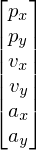

In [10]:
s = Speeds( ) #debug-iPython
self = KalmanFilter(s, "Landmarks")
reset( )
self._B*sym.Matrix([
    [2.3],
    [1.9],
    [7.8],
    [1.5],
    [1],
])

In [11]:
del self
del s
#end-iPython

# Constructor Class
doxygen-iPython

In [24]:
s = Speeds( ) #debug-iPython
#des-iPython def __init__(self, s):
#ini-tab -> Criando construtor
# Instantiating constructor for inherited class.
#edes-iPython super(Landmark, self).__init__(s, "Landmarks")
self = KalmanFilter(s, "Landmarks")

# Creating characteristic variables for landmarks and reading.
#eself-iPython update
self._parameters.update({
    "linear_acceleration": True,
    "precision": 0.6,
}) #self-iPython update

self._parameters = self._conf.readVariables(self._parameters)

reset( )

In [25]:
#end-tab -> Finalizando construtor

In [26]:
#ini-iPython

## Teste construtor

In [27]:
self._end( )
print self._parameters

vrx, vry, arx, ary = sym.symbols("vr_x vr_y ar_x ar_y")

__u = sym.Matrix([
    [vrx],
    [vry],
    [arx],
    [ary],
    [1],
])

self._B*__u

s[1]
#end-iPython

{'linear_acceleration': True, 'precision': 0.6, 'vision_error': 0.1}


{'R': Matrix([
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0]]), 'x_speed': Matrix([
 [0],
 [0],
 [0],
 [0],
 [1]])}

# update
.
doxygen-iPython

In [34]:
#eself-iPython update
#edes-iPython def update(self, data):
def update(data):
    self._predictedstate["x"][2:, 0] = -self._speeds[data["movement"]]["x_speed"][:len(self._speeds[data["movement"]]["x_speed"])-1, 0]
    self._predictedstate["covariance"] = self._speeds[data["movement"]]["R"]
    
    #edes-iPython super(Landmark, self).update(data)
    self.update(data)
    
    if self._predictedstate["covariance"][0, 0] < self._parameters['precision'] and self._predictedstate["covariance"][1, 1] < self._parameters['precision']:
        self._bkb.write_float("VISUAL_MEMORY_LAND_X", self._predictedstate["x"][0,0])
        self._bkb.write_float("VISUAL_MEMORY_LAND_Y", self._predictedstate["x"][1,0])
        self._bkb.write_float("VISUAL_MEMORY_LAND_LOC", 1)
    else:        
        self._bkb.write_float("VISUAL_MEMORY_LAND_LOC", 0)
    
    return [data["movement"], self._predictedstate["x"], self._predictedstate["covariance"]] #self-iPython update

In [35]:
#ini-iPython

## Teste update

In [36]:
data = {
    "movement": 1,
    "target": 1,
    "pos": [0, 0],
    "time": 1.0,
}

print update(data)
#end-iPython

[1, Matrix([
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0]]), Matrix([
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0]])]


# end
.
doxygen-iPython

In [ ]:
#eself-iPython end
#edes-iPython def end(self):
def end( ):
    self._end( ) #self-iPython end

In [ ]:
#ini-iPython

## Teste end

In [ ]:
end( )
#end-iPython

In [ ]:
#end-tab -> Finalizando classe

In [ ]:
#ini-iPython

# nova_variavel
.
doxygen-iPython

In [ ]:
nova_variavel = None #self-iPython nova_variavel

# nova_funcao
.
doxygen-iPython

In [ ]:
# eself-iPython nova_funcao
# edes-iPython def nova_funcao(self, variaveis_funcao):
def nova_funcao(variaveis_funcao):
    pass # self-iPython nova_funcao

In [ ]:
#ini-iPython

## Teste nova_funcao

In [ ]:

#end-iPython

In [ ]:
#end-iPython